# Local Search Implementation on Diagonal Magic Cube
## Made by:
- Jeremy Deandito / 18222112 

- Nathaniel Liady / 18222114

- Gabriel Marcellino / 18222115

- Nicolas Jeremy / 18222135

## Import relevant libraries

In [1]:
from tensor import *

from simulated import *
from hill_climb import *
from random_restart import *
from genetic import *


import numpy as np

## Cube Initialization

### Goal State
 Final state cube we are trying to achieve.<br><br> 
 The ideal state

In [2]:
goal_state = [

# Level 1
[
    [67,18,119,106,5],
    [116,17,14,73,95],
    [40,50,81,65,79],
    [56,120,55,49,35],
    [36,110,46,22,101]
],
# Level 2
[
    [66,72,27,102,48],
    [26,39,92,44,114],
    [32,93,88,83,19],
    [113,57,9,62,74],
    [78,54,99,24,60]
],
# Level 3
[
    [42,111,85,2,75],
    [30,118,21,123,23],
    [89,68,63,58,37],
    [103,3,105,8,96],
    [51,15,41,124,84]
],
# Level 4
[
    [115,98,4,1,97],
    [52,64,117,69,13],
    [107,43,38,33,94],
    [12,82,34,87,100],
    [29,28,122,125,11]
],
# Level 5
[
    [25,16,80,104,90],
    [91,77,71,6,70],
    [47,61,45,76,86],
    [31,53,112,109,10],
    [121,108,7,20,59]
]
]

In [3]:
goal_cube = Tensor(5,5,5,initial_array=goal_state)

In [4]:
obj_func_goal = goal_cube.objective_function()
print(f"goal cube objective function value: {obj_func_goal}")

goal cube objective function value: 0.0


### Problem Cube Initialization

In [5]:
problem_cube = Tensor(5,5,5)

cube = problem_cube.initial_state()

## Local Seach Implementation

### Random Restart Hill-Climbing


In [6]:
print(f"ideal objective function {obj_func_goal}")

ideal objective function 0.0


In [7]:
RR = Random_restart(cube=cube)

Initial Value: 721925.0

Restart: 1

Initial Value: 721925.0

Step 1: Choosen Neighbor Value: 587576.0; Best Value: 721925.0
Step 2: Choosen Neighbor Value: 519035.0; Best Value: 587576.0
Iteration Value: 519035.0

Best Value: 519035.0

Restart: 2

Initial Value: 721925.0

Step 1: Choosen Neighbor Value: 523412.0; Best Value: 721925.0
Step 2: Choosen Neighbor Value: 476049.0; Best Value: 523412.0
Iteration Value: 476049.0

Best Value: 476049.0

Restart: 3

Initial Value: 721925.0

Step 1: Choosen Neighbor Value: 503614.0; Best Value: 721925.0
Iteration Value: 503614.0

Best Value: 476049.0

Restart: 4

Initial Value: 721925.0

Step 1: Choosen Neighbor Value: 480235.0; Best Value: 721925.0
Iteration Value: 480235.0

Best Value: 476049.0

Restart: 5

Initial Value: 721925.0

Step 1: Choosen Neighbor Value: 607574.0; Best Value: 721925.0
Step 2: Choosen Neighbor Value: 490662.0; Best Value: 607574.0
Iteration Value: 490662.0

Best Value: 476049.0

Restart: 6

Initial Value: 721925.0

Step

In [8]:
RR.results()

+------------------------ RESULTS -------------------------+

    Best iteration: 33

  final Value: 374794.000000

+-------------------------- END ---------------------------+


In [9]:
# print(f"Random Restart Best Value: {RR.best_value}\n")
# print(f"Ideal Value: {obj_func_goal}\n")
# print(f"differences from ideal: {RR.best_value - obj_func_goal}")

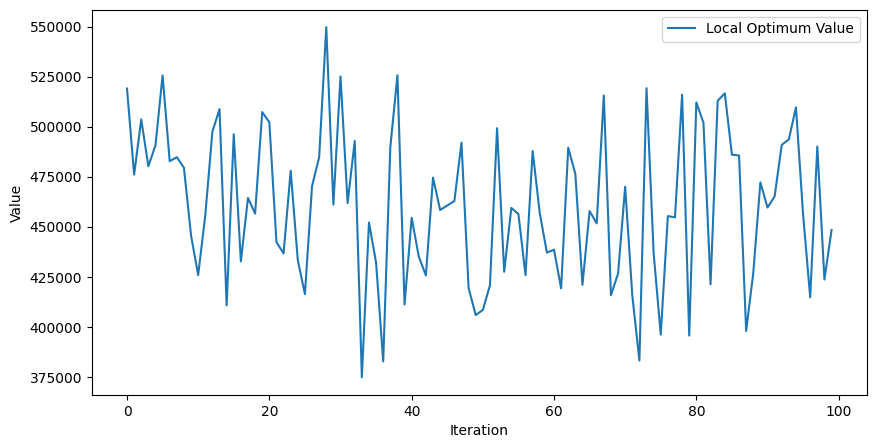

In [10]:
RR.hist_plot()

### Simulated Annealing

#### Initial State

In [11]:
# quadratica_cube = copy.deepcopy(cube)
SA_cube = copy.deepcopy(cube)

#### Searching

In [12]:
SA = Simulated(cube=SA_cube,tmax=1000,step_max=5000,cooling_schedule="quadratic",alpha=0.999)

Initial Energy: 721925.0

Step:1, Energy: 653663.0, Best Energy: 721925.0,Temperature: 1000, Probability: 1

Step:2, Energy: 572043.0, Best Energy: 653663.0,Temperature: 500.25012506253125, Probability: 1

Step:3, Energy: 562053.0, Best Energy: 572043.0,Temperature: 200.16012810248196, Probability: 1

Step:4, Energy: 525725.0, Best Energy: 562053.0,Temperature: 100.09008107296567, Probability: 1

Step:5, Energy: 519110.0, Best Energy: 525725.0,Temperature: 58.878944889307576, Probability: 1

Step:6, Energy: 491910.0, Best Energy: 519110.0,Temperature: 38.498556304138596, Probability: 1

Step:7, Energy: 460473.0, Best Energy: 491910.0,Temperature: 27.053349204631534, Probability: 1

Step:8, Energy: 444813.0, Best Energy: 460473.0,Temperature: 20.019619226842305, Probability: 1

Step:9, Energy: 431063.0, Best Energy: 444813.0,Temperature: 15.399778243193296, Probability: 1

Step:10, Energy: 413263.0, Best Energy: 431063.0,Temperature: 12.207180263430951, Probability: 1

Step:11, Energy: 

#### Plot

Best Energy 

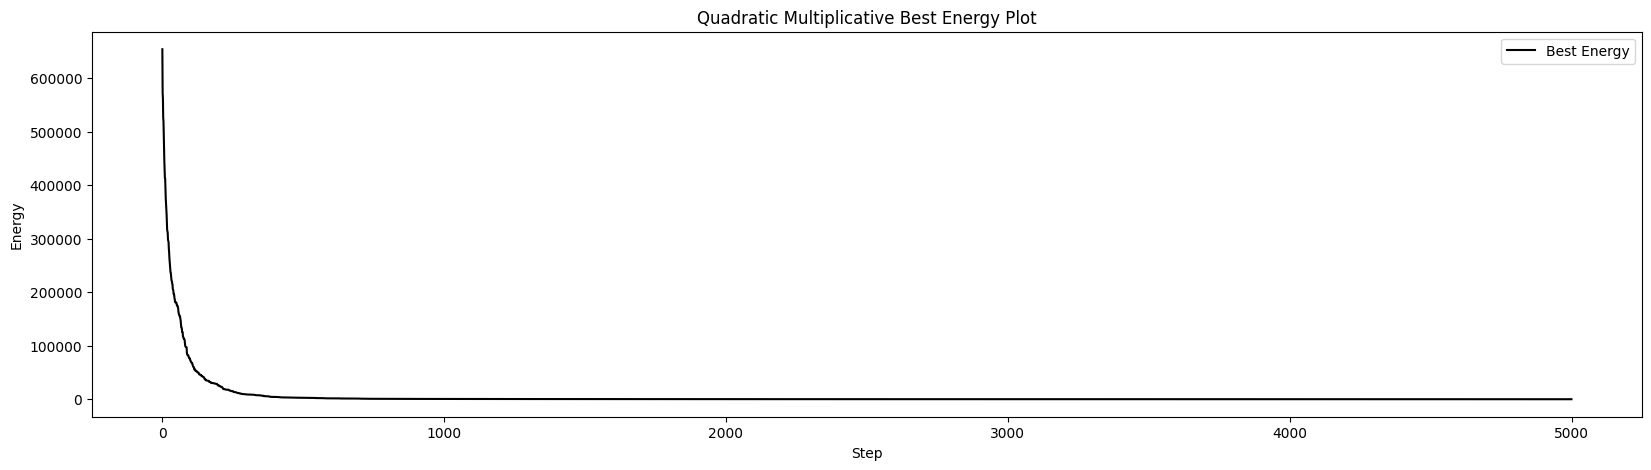

In [13]:
# SA_QuadraticA.hist_plot(Curr_energy=False,title="Quadratic Additive Best Energy Plot")
SA.hist_plot(Curr_energy=False,title="Quadratic Multiplicative Best Energy Plot")

Probability

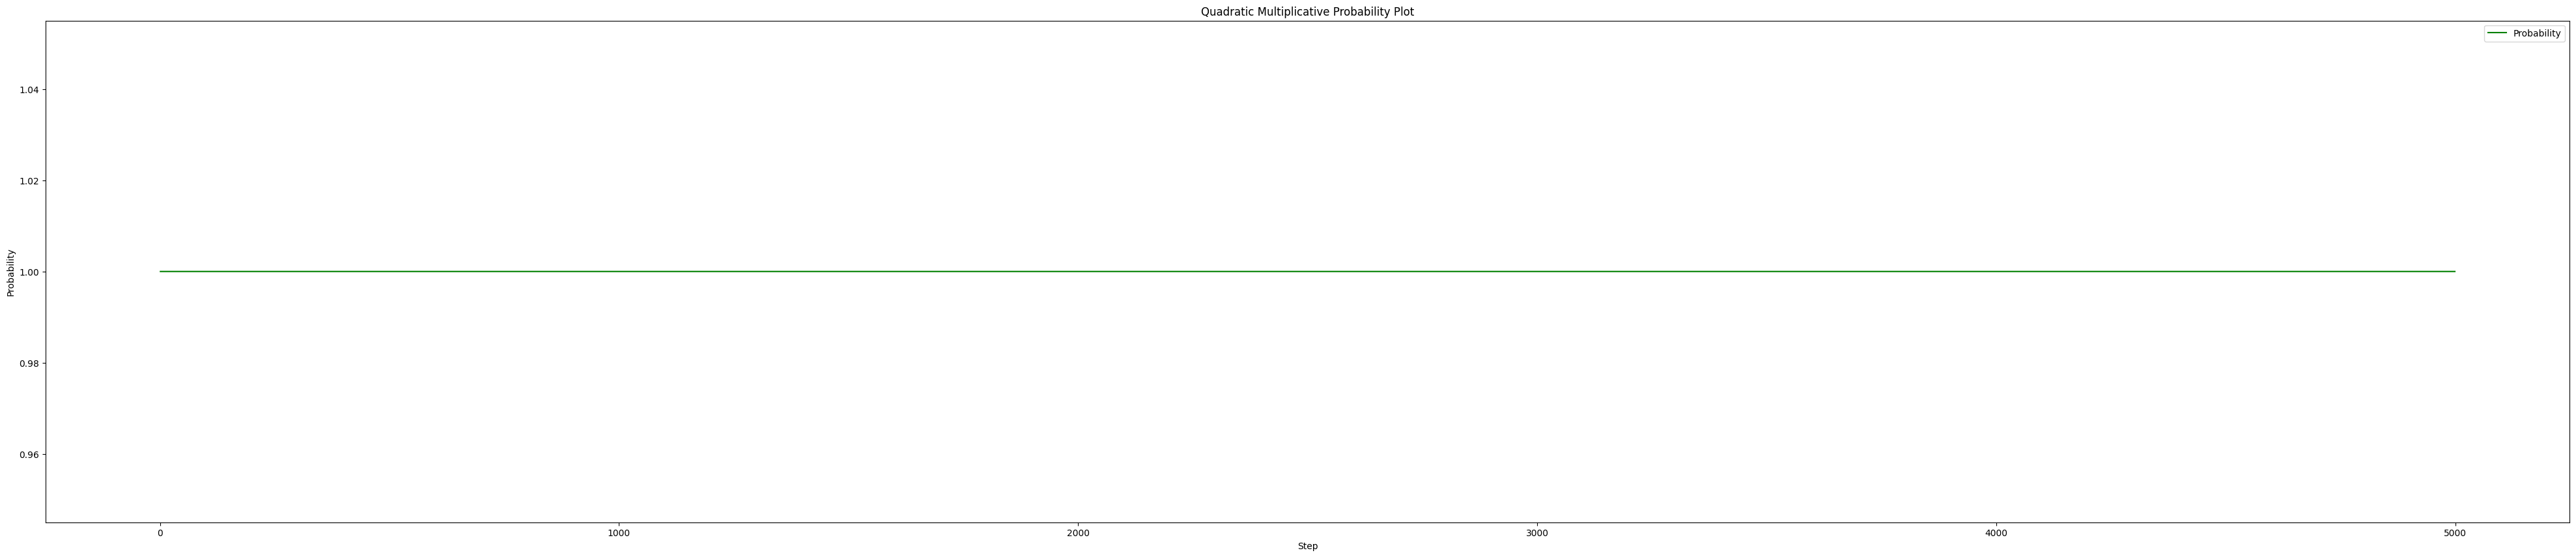

In [20]:
# SA_QuadraticA.prob_plot(title="Quadratic Additive Probability Plot")
SA.prob_plot(title="Quadratic Multiplicative Probability Plot")

#### Results

In [15]:
SA.results()

+------------------------ RESULTS -------------------------+

    cooling sched.: quadratic multiplicative
    initial temp: 1000
    final temp: 4.005605925765451e-05
    final step: 5000

    initial energy: 721925.000
    final energy: 172.000

    energy differences: 721753.000

    runtime: 42.130 seconds

+-------------------------- END ---------------------------+


### Genetic Algorithm(NJ)


In [16]:
GAcube = copy.deepcopy(cube)

In [17]:
# genetic_algo = GeneticAlgoNJ(
#     cube=GAcube,
#     population_size=500,
#     generation_rate=300,
#     mutation_rate=0.1,
#     elitism_size=10
# )

In [18]:
# genetic_algo.evolve()

In [19]:
# best_cube, best_fitness = genetic_algo.get_best_solution()

# # Plot the fitness evolution over generations
# genetic_algo.hist_plot()

# print("\nBest Fitness:", best_fitness)